In [120]:
from langgraph.graph import StateGraph, START, END
from dotenv import load_dotenv
from typing import TypedDict
from langchain_google_genai import ChatGoogleGenerativeAI

In [121]:
load_dotenv()

model = ChatGoogleGenerativeAI(model='gemini-2.5-pro')

In [122]:
class BlogState(TypedDict):
    topic: str
    outline: str
    blog: str
    evaluation: str

In [123]:
def generate_outline(state: BlogState) -> BlogState:
    topic = state["topic"]
    prompt = f"Generate a detailed outline in 1-2 lines for a blog post about: {topic}"
    outline = model.invoke(prompt).content
    print("Outline: " , outline)
    state["outline"] = outline
    return state

In [124]:
def generate_blog(state: BlogState) -> BlogState:
    outline = state["outline"]
    prompt = f"Write a comprehensive blog post based on the following outline:\n{outline}"
    blog = model.invoke(prompt).content
    # print("blog: " , blog)
    state["blog"] = blog
    return state

In [125]:
def evaluate_blog(state: BlogState) -> BlogState:
    blog = state["blog"]
    topic = state["topic"]
    outline = state["outline"]
    prompt = f"Evaluate the following blog post for quality and coherence on a NOTE: Scale of 1 to 10 only in number no words strictly give output in scale of 1 - 10 dont give summary:\n{blog}"
    evaluation = model.invoke(prompt).content
    print("Evaluation: " , evaluation)
    state["evaluation"] = evaluation
    return state

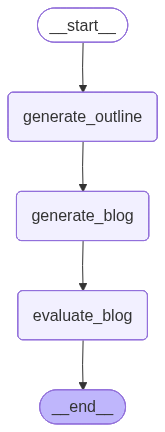

In [126]:
graph = StateGraph(BlogState)

graph.add_node('generate_outline', generate_outline)
graph.add_node('generate_blog', generate_blog)
graph.add_node('evaluate_blog', evaluate_blog)



graph.add_edge(START , 'generate_outline')
graph.add_edge('generate_outline', 'generate_blog')
graph.add_edge('generate_blog', 'evaluate_blog')
graph.add_edge('evaluate_blog', END)


graph.compile()

In [127]:
workflow  = graph.compile()
result = workflow.invoke({"topic": "The Future of AI in Everyday Life"})
print(result)

Outline:  This post will chart AI's evolution from today's smart assistants to a future of proactive personalization in health, home, and work, while examining the critical ethical challenges and societal shifts this will create.
Evaluation:  10
{'topic': 'The Future of AI in Everyday Life', 'outline': "This post will chart AI's evolution from today's smart assistants to a future of proactive personalization in health, home, and work, while examining the critical ethical challenges and societal shifts this will create.", 'blog': 'Of course. Here is a comprehensive blog post based on the provided outline.\n\n***\n\n## From "Hey Siri" to "Know Me": Charting the Evolution of Proactive AI\n\nWe’ve all done it. "Hey Siri, what\'s the weather?" "Alexa, set a timer for 15 minutes." "Okay Google, play my morning playlist." In just a few short years, AI has become a familiar, if somewhat basic, part of our daily lives. These digital assistants are powerful command-takers, dutifully waiting for 